# **Dataset**


The Auto MPG dataset provides fuel efficiency data (measured as *Miles Per Gallon*, MPG) for various car models from the 1970s and 1980s. The target variable `mpg_high` is a binary label indicating whether a car has high (1) or low (0) fuel efficiency based on its input features.

### Features:

- `cylinders` (int) – Number of engine cylinders *(categorical – discrete values like 4, 6, 8)*
- `displacement` (float) – Size of the engine in cubic inches *(continuous)*
- `horsepower` (float) – Engine horsepower *(continuous)*
- `weight` (float) – Vehicle weight in pounds *(continuous)*
- `acceleration` (float) – Time to accelerate from 0 to 60 mph in seconds *(continuous)*
- `model year` (int) – Year of manufacture *(categorical – ordinal)*
- `origin` (int) – Region of origin (1 = USA, 2 = Europe, 3 = Japan) *(categorical)*
- `car name` (string) – Car model name *(categorical)*
- `mpg_high` (int) – **Target**: 1 if the car has high MPG (above median), 0 otherwise *(binary categorical)*


# **Loading the dataset**

In [80]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('auto_mpg_binarised.csv')
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg_high
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,1
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,1
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,1
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,1


In [81]:
df.shape

(398, 9)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg_high      398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


* There are no missing values in the dataset.
* From the `.info()` output, it appears that only one feature — `car_name` — is explicitly stored as a categorical (object) type.

* However, other features with `int` or `float` types may actually represent categorical variables (e.g., `cylinders`, `origin`). These should be further investigated using their number of unique values to determine if they are nominal or ordinal categories misrepresented as numerical data.


In [83]:
for col in df.columns:
    print(f"{col}: {len(df[col].unique())} unique values")
    print("")


cylinders: 5 unique values

displacement: 82 unique values

horsepower: 94 unique values

weight: 351 unique values

acceleration: 95 unique values

model_year: 13 unique values

origin: 3 unique values

car_name: 305 unique values

mpg_high: 2 unique values



### Observation on Unique Values

- `cylinders`, `model_year`, and `origin` have few unique values and are categorical.
- `displacement`, `horsepower`, `weight`, and `acceleration` have many unique values and are continuous.
- `mpg_high` is binary and suitable as a classification target.
- We will use `displacement`, `horsepower`, `weight` and  `acceleration` as numeric cols for further analysis



# **Missing values analysis**

# **Randomly inserted missing values in 10% of each continuous numeric column to test imputation methods.**


In [84]:
# Create a copy to preserve original
df_10 = df.copy()

# True continuous numeric variables
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Fix seed for reproducibility
np.random.seed(42)


for col in numeric_cols:
    n_missing = int(0.1 * len(df_10))
    missing_rows = np.random.choice(df_10.index, size=n_missing, replace=False)
    df_10.loc[missing_rows, col] = np.nan


In [85]:
df_10.head(20)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg_high
0,8,NaN,130.0,3504.0,NaN,70,1,chevrolet chevelle malibu,0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0
5,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,0
6,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,0
7,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,0
8,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,0
9,8,NaN,190.0,3850.0,8.5,70,1,amc ambassador dpl,0


## Imputation Strategies Applied


- **Attribute Mean Imputation:** Replaced missing values with the mean of each numeric column.
- **Attribute Median Imputation:** Replaced missing values with the median of each numeric column.
- **Attribute Mode Imputation:** Replaced missing values with the most frequent value (mode) across the entire dataset for each column.
- **Class-wise Mode Imputation:** For each column with missing values, the dataset is grouped by the `mpg_high class` label. Then, for each group, missing values in that column are replaced with the mode computed only from rows within that same class. This ensures that the imputed value reflects the distribution specific to each class


In [86]:
from sklearn.impute import SimpleImputer

# 1. Imputation by mean
imputer_mean = SimpleImputer(strategy='mean')
df_mean_10 = df_10.copy()
df_mean_10[numeric_cols] = imputer_mean.fit_transform(df_mean_10[numeric_cols])

# 2. Imputation by median
imputer_median = SimpleImputer(strategy='median')
df_median_10 = df_10.copy()
df_median_10[numeric_cols] = imputer_median.fit_transform(df_median_10[numeric_cols])

# 3. Imputation by mode (global most frequent)
imputer_mode = SimpleImputer(strategy='most_frequent')
df_mode_10 = df_10.copy()
df_mode_10[numeric_cols] = imputer_mode.fit_transform(df_mode_10[numeric_cols])

# 4. Imputation by mode within each class
df_mode_by_class_10 = df_10.copy()
for label in df_mode_by_class_10['mpg_high'].unique():
    class_mask = df_mode_by_class_10['mpg_high'] == label
    class_df = df_mode_by_class_10.loc[class_mask, numeric_cols]
    class_mode = class_df.mode().iloc[0]
    df_mode_by_class_10.loc[class_mask, numeric_cols] = class_df.fillna(class_mode)


# **Principal Component Analysis (PCA) to Compare the Impact of Different Imputation Strategies**



### PCA Analysis of Imputed Datasets

**Principal Component Analysis (PCA)** is a technique that transforms the data into a new coordinate system such that the greatest variance lies on the first axis (PC1), the second greatest on the second axis (PC2), and so on. It reduces dimensionality while preserving the most important patterns in the data.

We applied PCA to the original and imputed datasets to:
- Quantify how much variance is captured by each principal component.
- Visualize the data in 2D (PC1 vs. PC2) to compare the structure and class separation across different imputation strategies.




In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def analyze_single_pca(df, name, numeric_cols, original_reference=None):
    print(f"\n\n==== {name} ====")
    X = df[numeric_cols]
    y = df['mpg_high'].astype(str)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca_full = pca.fit_transform(X_scaled)

    # Print explained variance for all components
    explained_var = pca.explained_variance_ratio_ * 100
    print("Explained Variance (%):")
    for i, var in enumerate(explained_var, start=1):
        print(f"  PC{i}: {var:.2f}%")

    # Loadings matrix (full) (Each column is a unit PC vector )
    loadings = pd.DataFrame(pca.components_.T,
                            columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                            index=numeric_cols)
    print("\nLoadings Matrix:")
    print(loadings)

    # Bar plot for PC1 contributions
    plt.figure(figsize=(8, 4))
    loadings['PC1'].plot(kind='bar', title=f'Feature Contributions to PC1 - {name}', color='darkcyan')
    plt.ylabel('Contribution')
    plt.tight_layout()
    plt.show()

    # Define 2D biplot using first 2 PCs
    def biplot(score, coeff, labels, y, title):
        xs = score[:, 0]
        ys = score[:, 1]

        # Plot each class with its own color and label
        for cls, color in zip(['0', '1'], ['tab:blue', 'tab:orange']):
            idx = (y == cls)
            plt.scatter(xs[idx], ys[idx], alpha=0.5, c=color, label=f'Class {cls}')


        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title(title)
        plt.grid()
        plt.legend()

    if original_reference is None:
        plt.figure(figsize=(6, 5))
        biplot(X_pca_full, pca.components_.T, labels=numeric_cols, y=y, title=f"Biplot - {name}")
        plt.tight_layout()
        plt.show()
    else:
        orig_name, orig_df = original_reference
        orig_X = orig_df[numeric_cols]
        orig_y = orig_df['mpg_high'].astype(str)
        orig_scaled = StandardScaler().fit_transform(orig_X)
        orig_pca = PCA().fit(orig_scaled)
        orig_scores = orig_pca.transform(orig_scaled)
        orig_components = orig_pca.components_.T

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        plt.sca(axs[0])
        biplot(orig_scores, orig_components, labels=numeric_cols, y=orig_y, title=f"{orig_name}")

        plt.sca(axs[1])
        biplot(X_pca_full, pca.components_.T, labels=numeric_cols, y=y, title=f"{name}")

        plt.tight_layout()
        plt.show()




==== Original ====
Explained Variance (%):
  PC1: 80.07%
  PC2: 16.34%
  PC3: 2.23%
  PC4: 1.37%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.534895  0.250421 -0.452460 -0.668174
horsepower    0.540960 -0.029110  0.828942 -0.139179
weight        0.513193  0.437846 -0.200233  0.710514
acceleration -0.397346  0.862979  0.260850 -0.171293


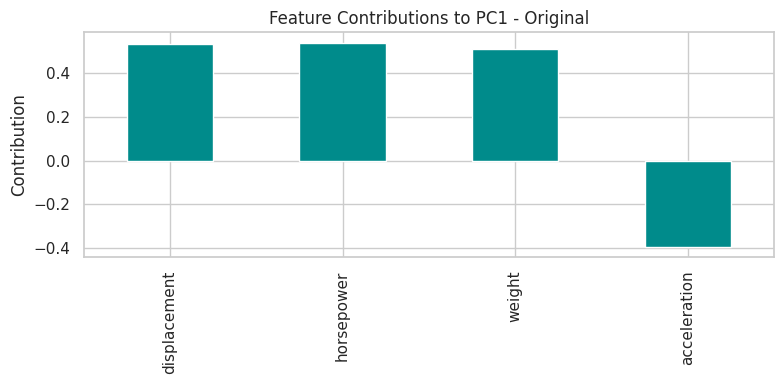

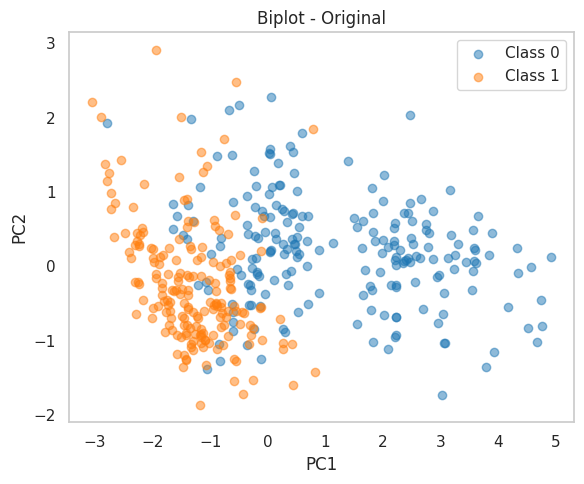

In [88]:
# First, for the original dataset:
analyze_single_pca(df, "Original", numeric_cols)





==== Mean Imputed ====
Explained Variance (%):
  PC1: 73.82%
  PC2: 17.04%
  PC3: 5.39%
  PC4: 3.75%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.528451  0.292267 -0.577370 -0.549512
horsepower    0.537288 -0.048797  0.776627 -0.325256
weight        0.519721  0.418167 -0.021398  0.744694
acceleration -0.402431  0.858682  0.251072 -0.194104


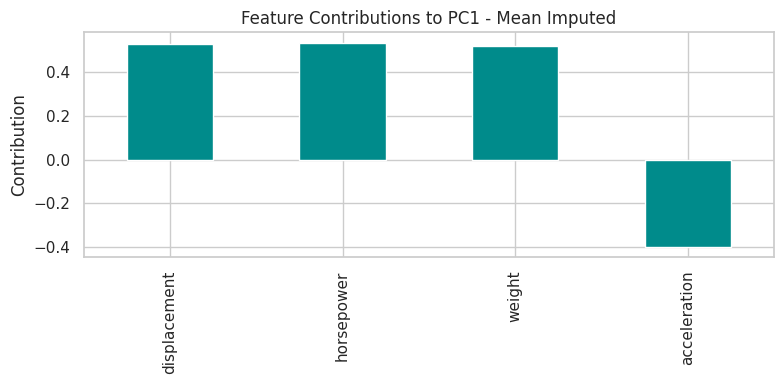

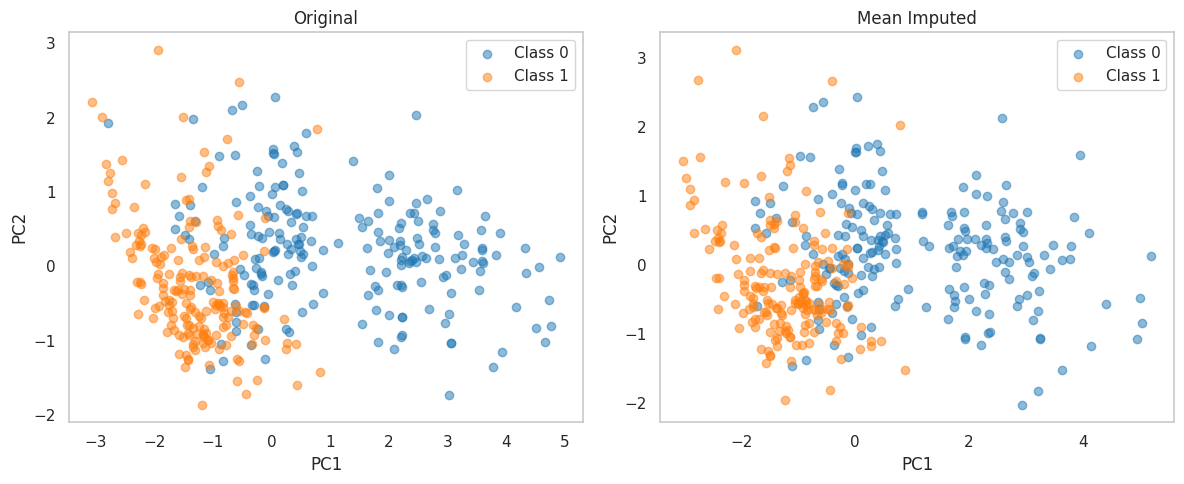

In [89]:
analyze_single_pca(df_mean_10, "Mean Imputed", numeric_cols, original_reference=("Original", df))



==== Median Imputed ====
Explained Variance (%):
  PC1: 72.98%
  PC2: 17.08%
  PC3: 5.97%
  PC4: 3.97%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.525977  0.305115 -0.598829 -0.521207
horsepower    0.536043 -0.061296  0.758217 -0.366070
weight        0.520886  0.419381  0.024421  0.743102
acceleration -0.405812  0.852799  0.256738 -0.205269


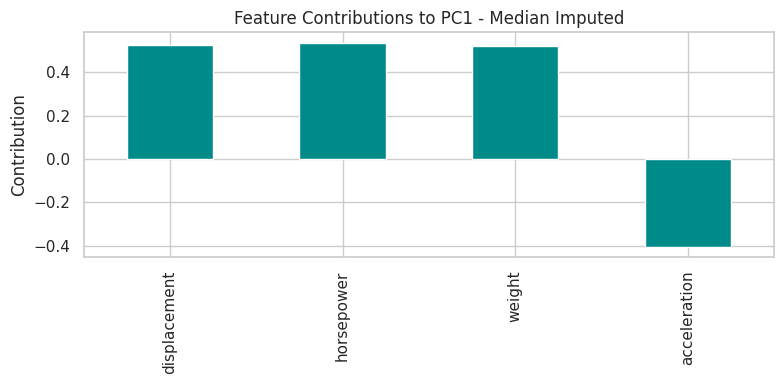

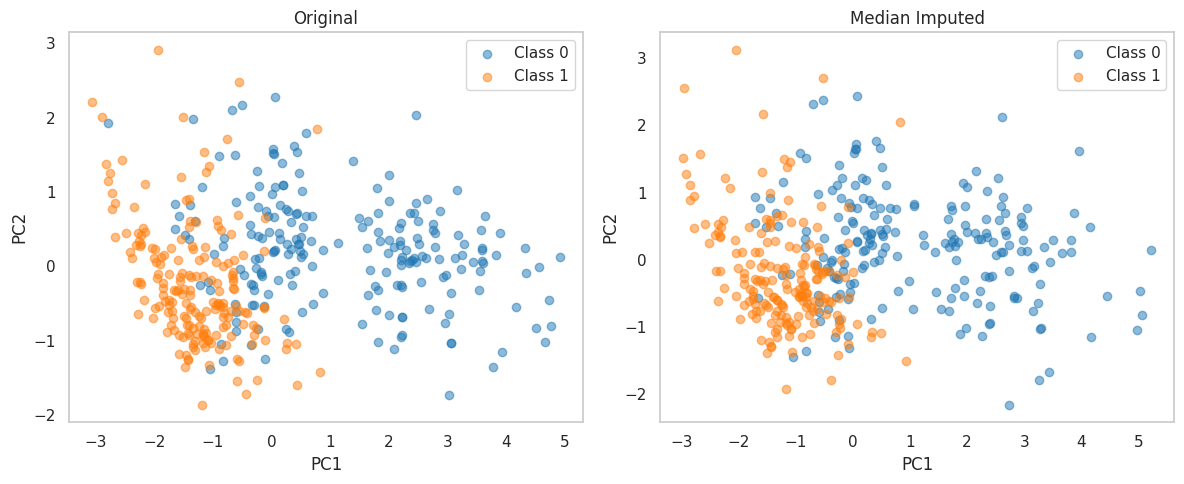

In [90]:
analyze_single_pca(df_median_10, "Median Imputed", numeric_cols, original_reference=("Original", df))




==== Mode Imputed ====
Explained Variance (%):
  PC1: 70.15%
  PC2: 17.57%
  PC3: 7.07%
  PC4: 5.21%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.524444  0.298699 -0.666235 -0.438028
horsepower    0.538575 -0.049311  0.704243 -0.459943
weight        0.521038  0.415711  0.111976  0.736997
acceleration -0.404246  0.857632  0.218253 -0.231125


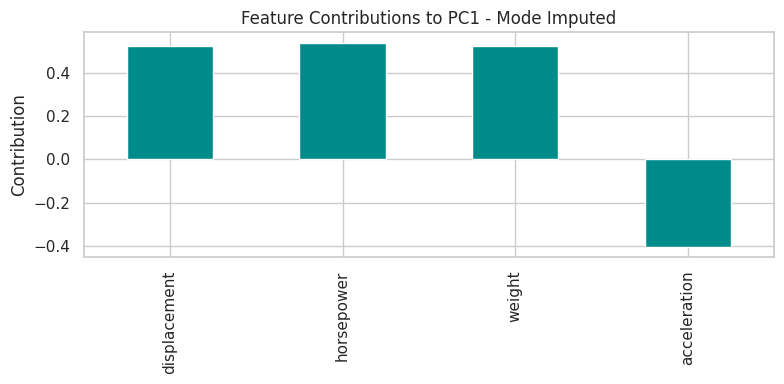

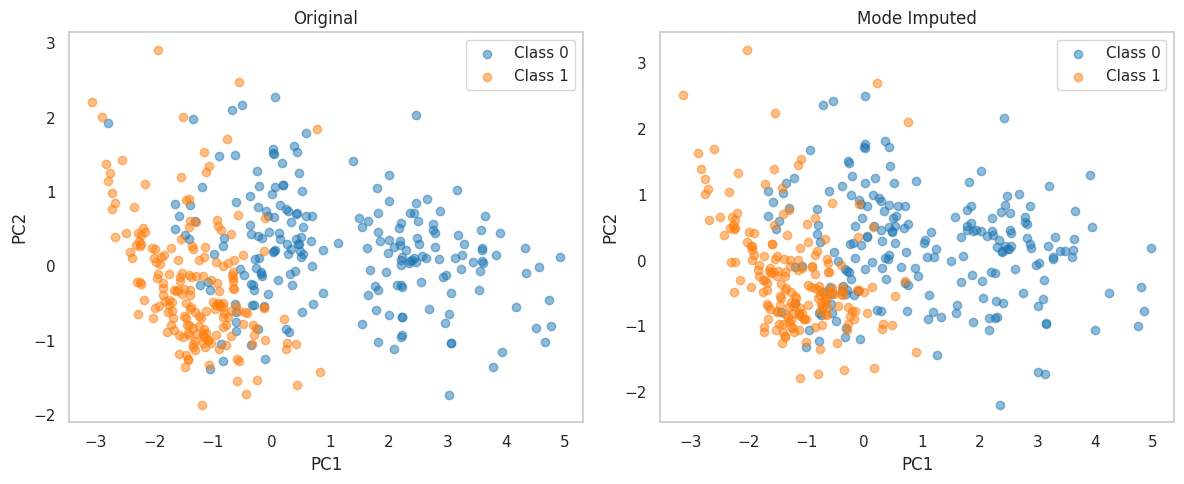

In [91]:
analyze_single_pca(df_mode_10, "Mode Imputed", numeric_cols, original_reference=("Original", df))




==== Mode by Class ====
Explained Variance (%):
  PC1: 76.62%
  PC2: 16.59%
  PC3: 3.68%
  PC4: 3.11%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.533749  0.254156 -0.366300  0.718569
horsepower    0.540664 -0.016837  0.840432  0.032775
weight        0.513371  0.427666 -0.295057 -0.683003
acceleration -0.399056  0.867308  0.269147  0.126853


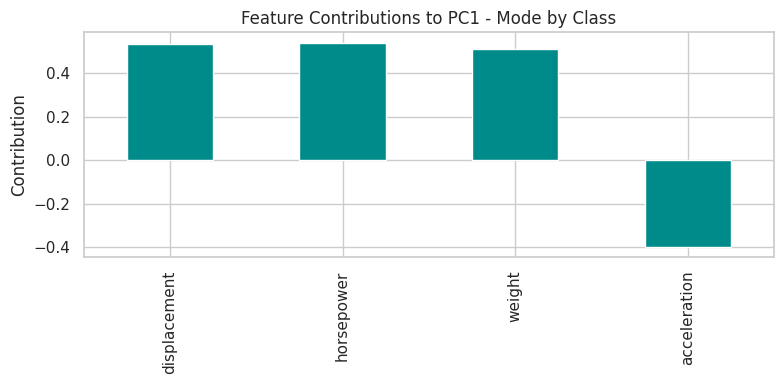

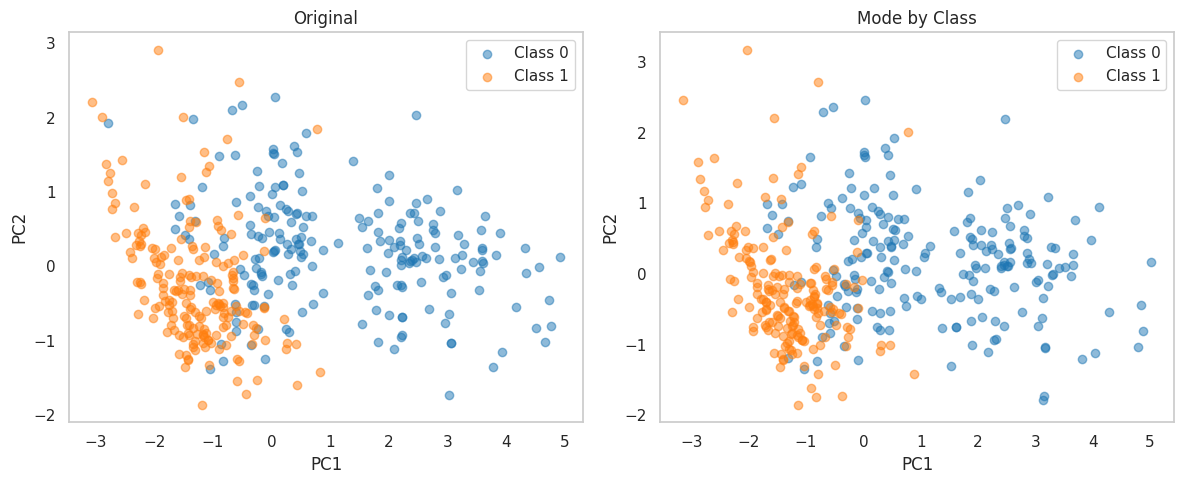

In [92]:
analyze_single_pca(df_mode_by_class_10, "Mode by Class", numeric_cols, original_reference=("Original", df))





- The original dataset has the highest variance explained by PC1 (80%), meaning the first principal component captures most of the variability in the data.
- Among all imputed versions, **Mode by Class** preserves the most variance in PC1 (76%), making it the closest to the original in terms of variance distribution.
- Mean and median imputations explain slightly less variance in PC1 (around 73%), while mode explains the least (70%), with more spread into later components.

# **Randomly inserted missing values in 30% of each continuous numeric column to test imputation methods.**

In [93]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Start from a clean version of the original dataframe (with no missing values)
df_base = df.copy()  # Assuming df has no NaNs after initial horsepower imputation

# Define the numeric columns
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Create df_30 by injecting 30% NaNs into the numeric columns
df_30 = df_base.copy()

for col in numeric_cols:
    n_missing = int(0.3 * len(df_30))
    missing_rows = np.random.choice(df_30.index, size=n_missing, replace=False)
    df_30.loc[missing_rows, col] = np.nan


In [94]:
df_30.head(20)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg_high
0,8,NaN,130.0,NaN,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,8,318.0,150.0,3436.0,NaN,70,1,plymouth satellite,0
3,8,304.0,NaN,3433.0,12.0,70,1,amc rebel sst,0
4,8,NaN,140.0,3449.0,10.5,70,1,ford torino,0
5,8,429.0,NaN,NaN,NaN,70,1,ford galaxie 500,0
6,8,454.0,220.0,4354.0,NaN,70,1,chevrolet impala,0
7,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,0
8,8,455.0,225.0,NaN,10.0,70,1,pontiac catalina,0
9,8,NaN,190.0,3850.0,NaN,70,1,amc ambassador dpl,0


## Imputation Strategies Applied


- **Attribute Mean Imputation:** Replaced missing values with the mean of each numeric column.
- **Attribute Median Imputation:** Replaced missing values with the median of each numeric column.
- **Attribute Mode Imputation:** Replaced missing values with the most frequent value (mode) across the entire dataset for each column.
- **Class-wise Mode Imputation:** For each class label in `mpg_high`, missing values were filled using the mode calculated from rows belonging only to that class.


In [95]:
# 1. Imputation by mean
imputer_mean = SimpleImputer(strategy='mean')
df_mean_30 = df_30.copy()
imputed_mean = imputer_mean.fit_transform(df_mean_30[numeric_cols])
df_mean_30[numeric_cols] = pd.DataFrame(imputed_mean, columns=numeric_cols, index=df_mean_30.index)

# 2. Imputation by median
imputer_median = SimpleImputer(strategy='median')
df_median_30 = df_30.copy()
imputed_median = imputer_median.fit_transform(df_median_30[numeric_cols])
df_median_30[numeric_cols] = pd.DataFrame(imputed_median, columns=numeric_cols, index=df_median_30.index)

# 3. Imputation by mode (global)
imputer_mode = SimpleImputer(strategy='most_frequent')
df_mode_30 = df_30.copy()
imputed_mode = imputer_mode.fit_transform(df_mode_30[numeric_cols])
df_mode_30[numeric_cols] = pd.DataFrame(imputed_mode, columns=numeric_cols, index=df_mode_30.index)

# 4. Imputation by mode within each class
df_mode_by_class_30 = df_30.copy()
for label in df_mode_by_class_30['mpg_high'].unique():
    class_mask = df_mode_by_class_30['mpg_high'] == label
    class_df = df_mode_by_class_30.loc[class_mask, numeric_cols]
    class_mode = class_df.mode().iloc[0]
    df_mode_by_class_30.loc[class_mask, numeric_cols] = class_df.fillna(class_mode)


# **Principal Component Analysis (PCA) to Compare the Impact of Different Imputation Strategies**


## **PCA visulalization of original data**



==== Original ====
Explained Variance (%):
  PC1: 80.07%
  PC2: 16.34%
  PC3: 2.23%
  PC4: 1.37%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.534895  0.250421 -0.452460 -0.668174
horsepower    0.540960 -0.029110  0.828942 -0.139179
weight        0.513193  0.437846 -0.200233  0.710514
acceleration -0.397346  0.862979  0.260850 -0.171293


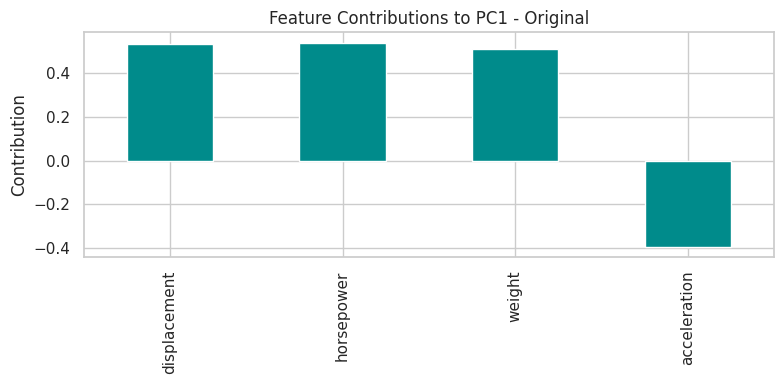

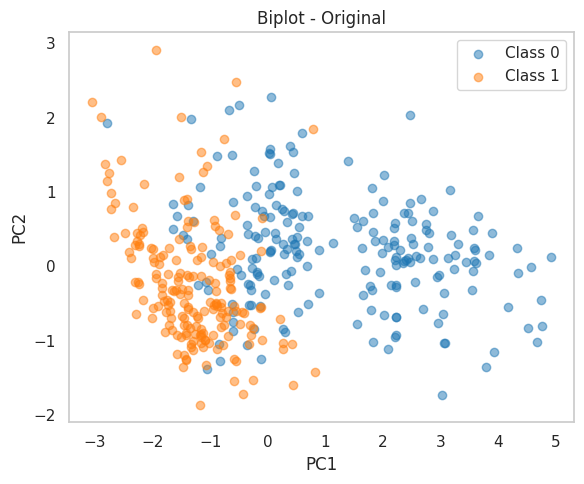

In [96]:
# First, for the original dataset:
analyze_single_pca(df, "Original", numeric_cols)


## **PCA visulalization of Mean Imputed data**



==== Mean Imputed ====
Explained Variance (%):
  PC1: 62.84%
  PC2: 19.91%
  PC3: 9.22%
  PC4: 8.03%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.524658  0.332651  0.690332 -0.370834
horsepower    0.547047 -0.064978 -0.659316 -0.511683
weight        0.529763  0.361581 -0.175678  0.746825
acceleration -0.380558  0.868551 -0.240584 -0.207158


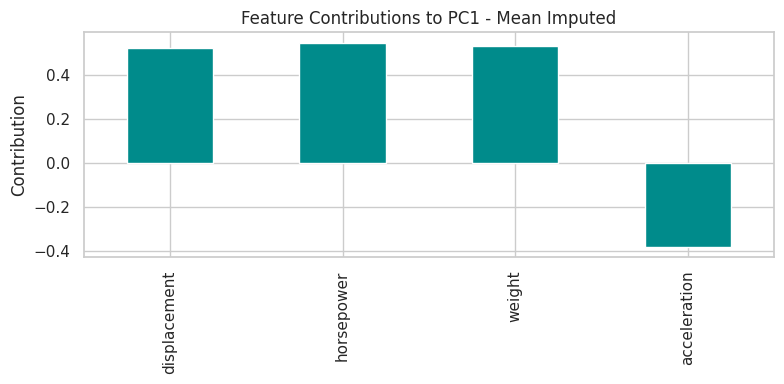

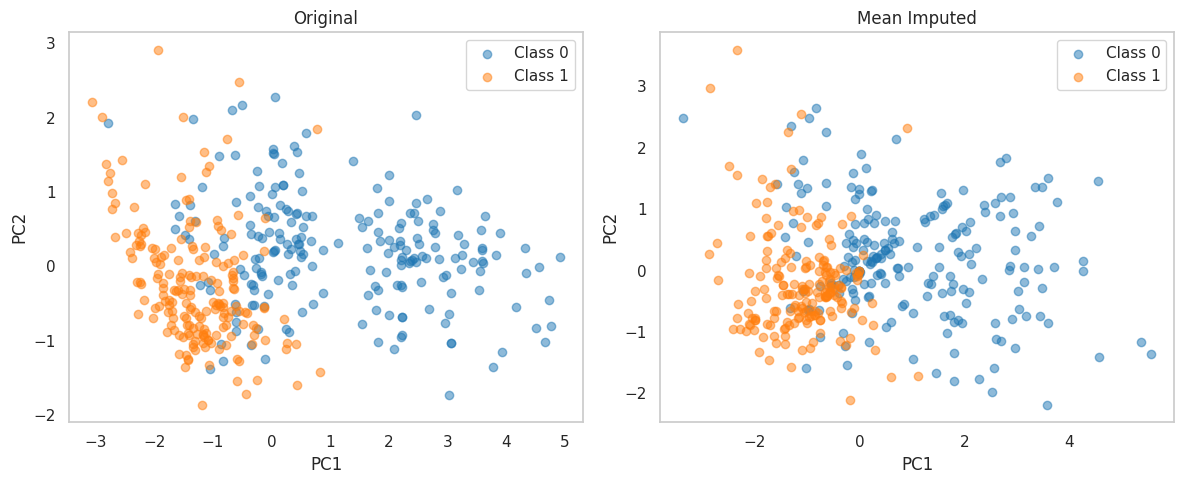

In [97]:
analyze_single_pca(df_mean_30, "Mean Imputed", numeric_cols, original_reference=("Original", df))

## **PCA visulalization of Median Imputed data**



==== Median Imputed ====
Explained Variance (%):
  PC1: 61.96%
  PC2: 20.21%
  PC3: 9.73%
  PC4: 8.11%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.515654  0.375927  0.729976 -0.244775
horsepower    0.550190 -0.092134 -0.549706 -0.621793
weight        0.532366  0.348063 -0.319835  0.702243
acceleration -0.384679  0.853840 -0.250330 -0.245590


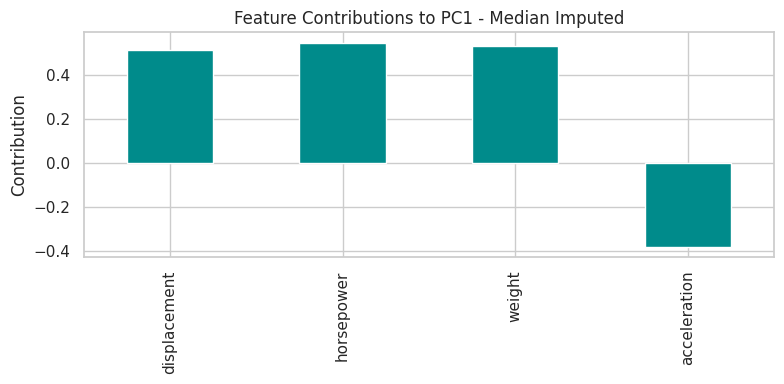

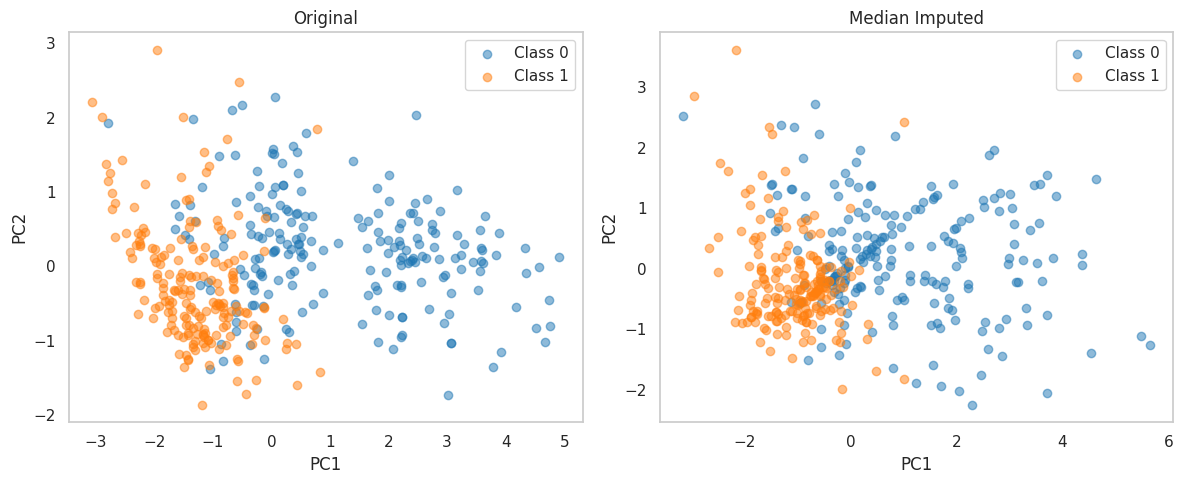

In [98]:
analyze_single_pca(df_median_30, "Median Imputed", numeric_cols, original_reference=("Original", df))

## **PCA visulalization of Mode Imputed data**



==== Mode Imputed ====
Explained Variance (%):
  PC1: 54.95%
  PC2: 20.15%
  PC3: 13.65%
  PC4: 11.25%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.541568  0.299682 -0.234609  0.749569
horsepower    0.524458 -0.045166  0.844747 -0.096467
weight        0.525109  0.389896 -0.379869 -0.654172
acceleration -0.394854  0.869558  0.295059  0.029980


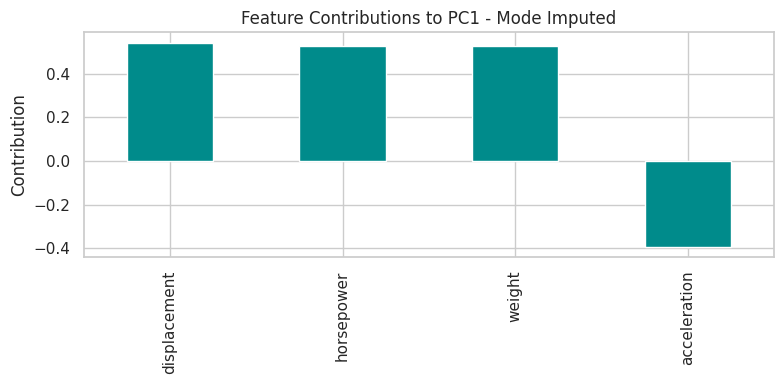

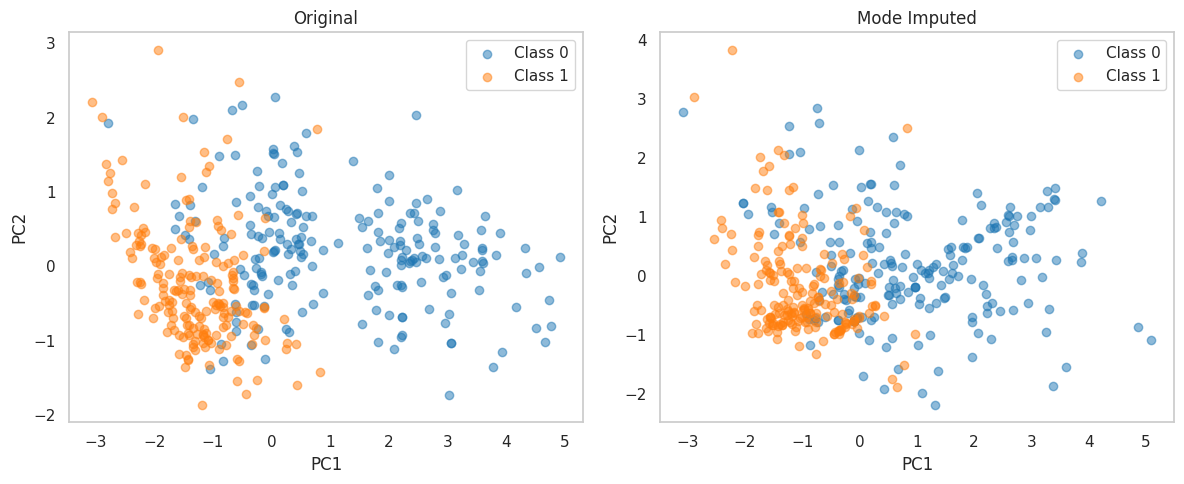

In [99]:
analyze_single_pca(df_mode_30, "Mode Imputed", numeric_cols, original_reference=("Original", df))

## **PCA visulalization of class wise Mode Imputed data**



==== Mode by class ====
Explained Variance (%):
  PC1: 71.54%
  PC2: 19.22%
  PC3: 5.12%
  PC4: 4.11%

Loadings Matrix:
                   PC1       PC2       PC3       PC4
displacement  0.542895  0.225194 -0.494979 -0.639960
horsepower    0.547034  0.044266  0.821327 -0.155617
weight        0.534531  0.321967 -0.231990  0.746187
acceleration -0.346835  0.918513  0.163092 -0.097161


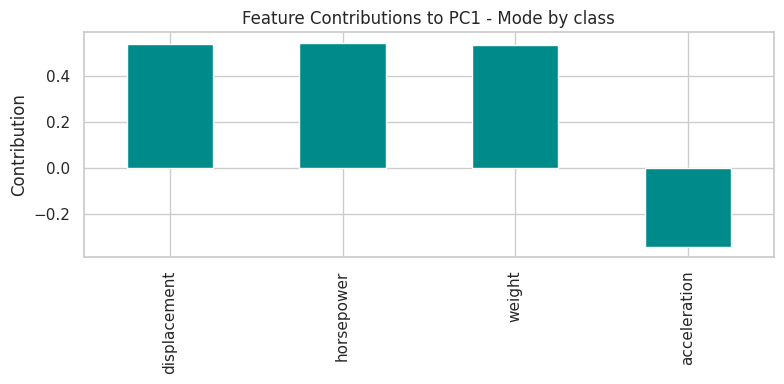

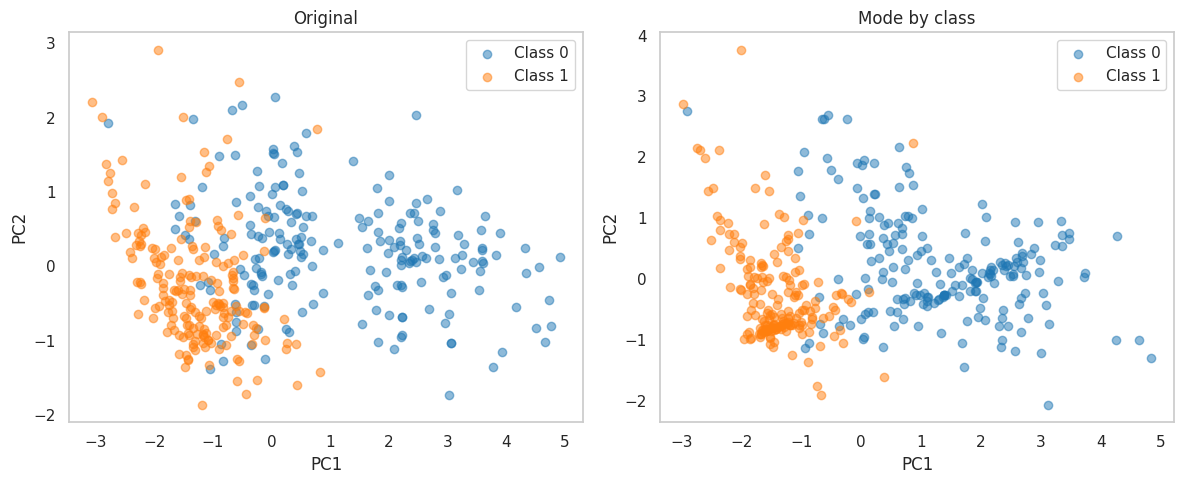

In [100]:
analyze_single_pca(df_mode_by_class_30, "Mode by class", numeric_cols, original_reference=("Original", df))

## **PCA Observations After 30% Missing Data**

- As the proportion of missing data increases, all imputation methods show a **drop in PC1 variance**, indicating loss of information.
- **Mode by Class** again retains the highest PC1 variance (71%) after the original (80%), suggesting it handles high missingness better than others.
- **Mean** and **Median** imputations show moderate PC1 variance (around 62% and 61% resp.), while **Mode Imputation** performs the worst (PC1 = 54 %).


# **Final Dataset Selection**: Since the original dataset has no missing values and preserves the most variance in PCA while showing clear class separation, we proceed with the original dataset for all further visualizations and analysis.


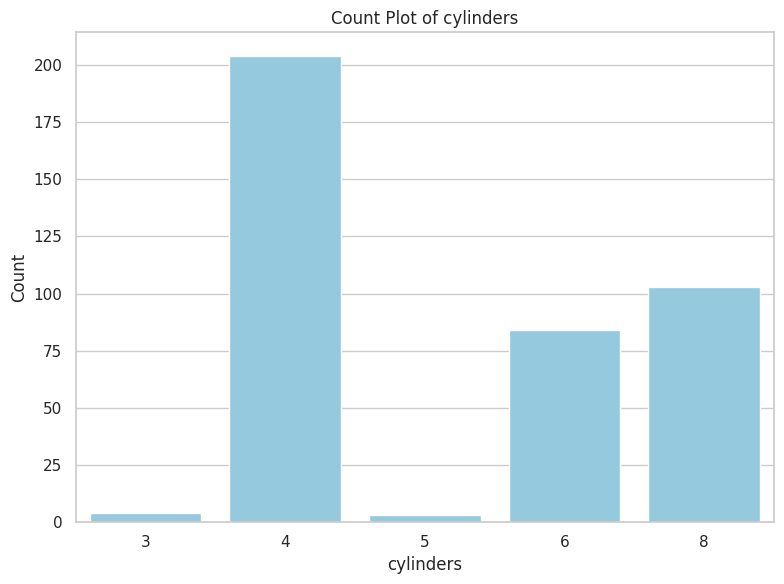

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_feature(df, col):
    sns.set(style="whitegrid")

    plot_data = df.copy()
    if col == 'origin':
        plot_data['origin'] = plot_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

    plt.figure(figsize=(8, 6))
    sns.countplot(data=plot_data, x=col, color='skyblue')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


plot_categorical_feature(df, 'cylinders')


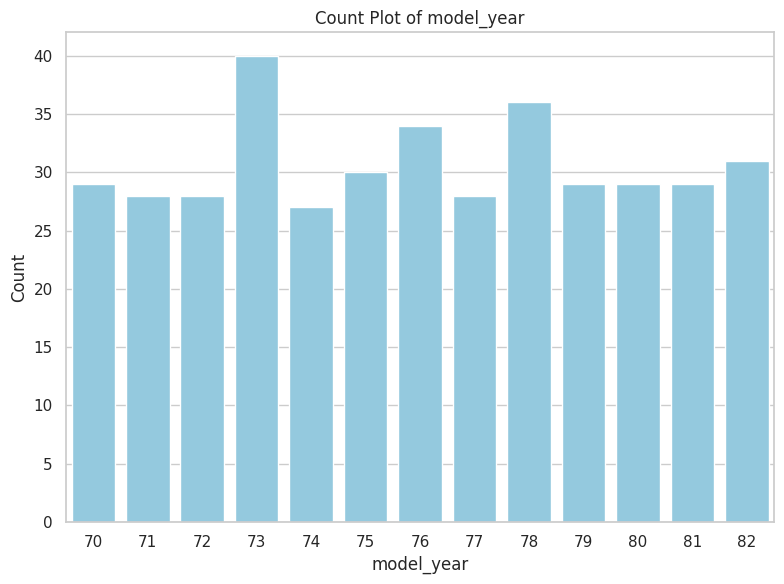

In [102]:
plot_categorical_feature(df, 'model_year')


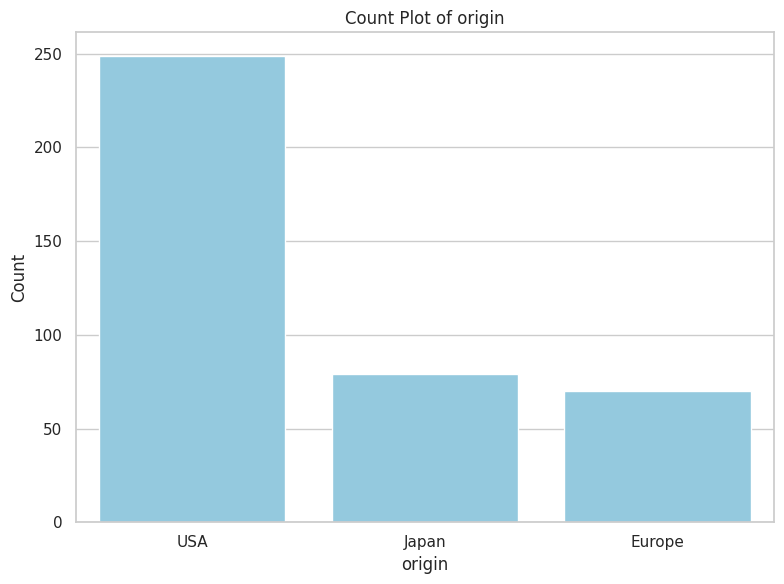

In [103]:
plot_categorical_feature(df, 'origin')

# **Pairplots for numeric features**

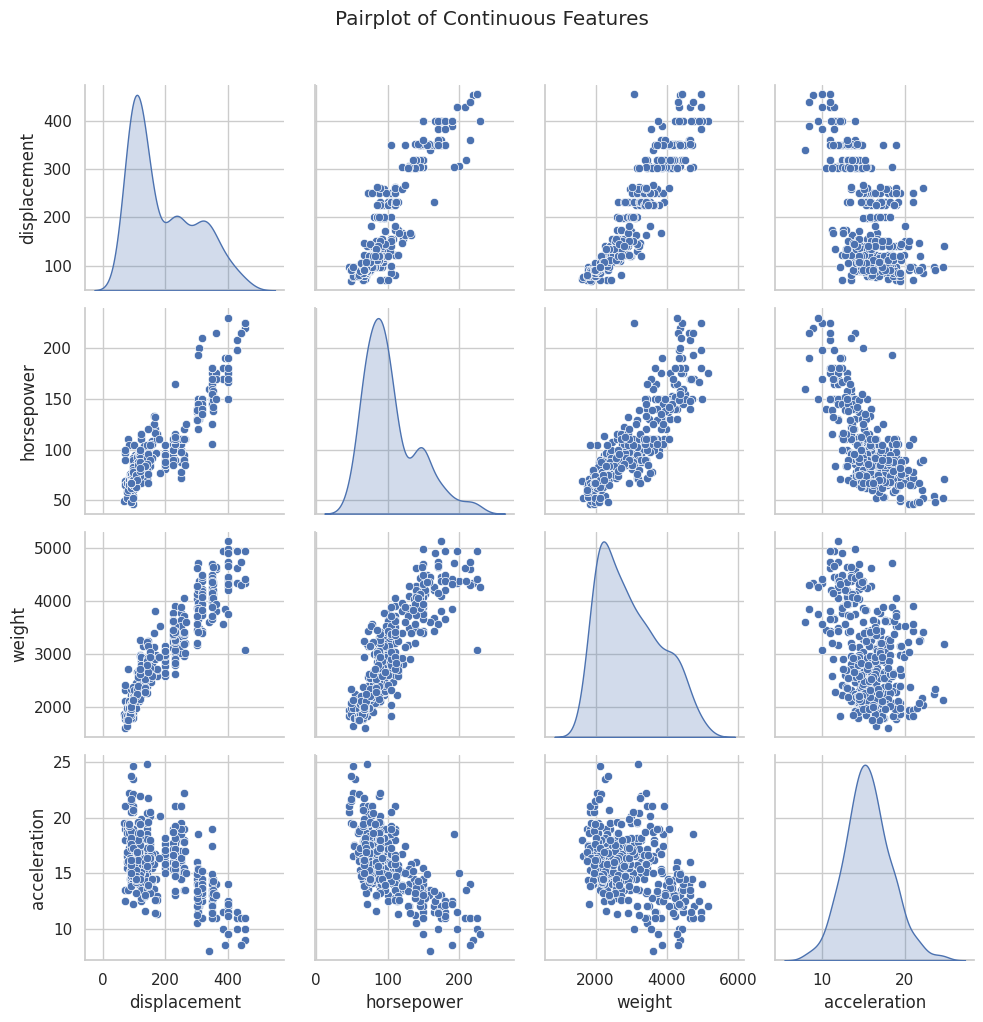

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the pairplot (no hue)
pairplot = sns.pairplot(df, vars=numeric_cols, diag_kind='kde')

# Add title and adjust layout
plt.suptitle("Pairplot of Continuous Features", y=1.02)
plt.tight_layout()
plt.show()


### Observations from Pairplot

- `displacement`, `horsepower`, and `weight` show strong positive linear relationships with each other. This is consistent with their high correlation seen earlier.
- `acceleration` is negatively related to all three above — especially `horsepower` and `weight`, though the relationships are weaker and more scattered.
- The diagonal plots (KDEs) show that `displacement`, `horsepower`, and `weight` are **right-skewed**, while `acceleration` appears **roughly symmetric**.



# **Pairplot of numeric cols with Class-Based Coloring**

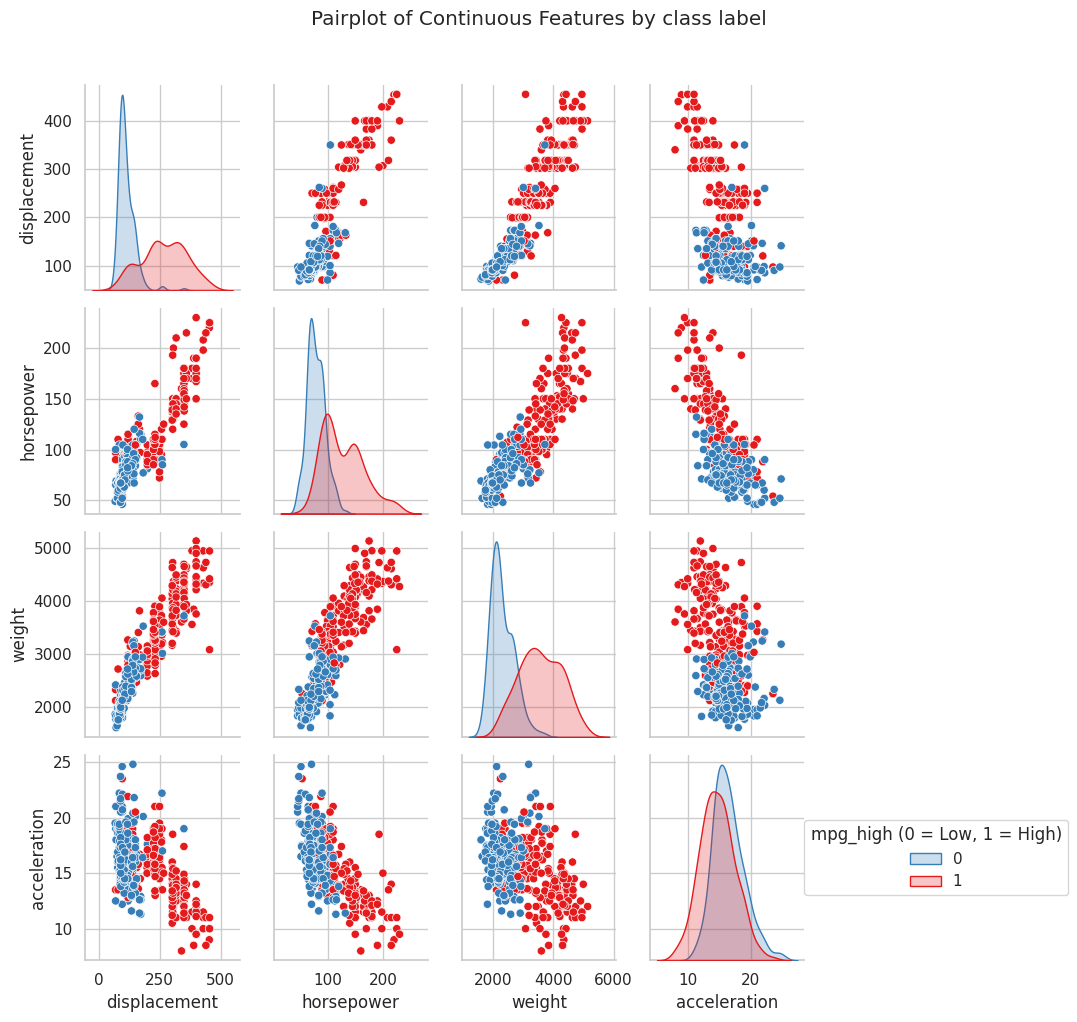

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define continuous features
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Create pairplot (no tight layout yet)
pairplot = sns.pairplot(df, vars=numeric_cols, hue='mpg_high', palette='Set1', diag_kind='kde')

# Manually place legend outside the plot area
pairplot._legend.remove()  # remove auto-legend
plt.legend(
    title="mpg_high (0 = Low, 1 = High)",
    labels=["0", "1"],
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    borderaxespad=0.
)

# Adjust layout
plt.suptitle("Pairplot of Continuous Features by class label", y=1.02)
plt.tight_layout()
plt.show()


### Observations from Class-Colored Pairplot


- High-efficiency cars (red) tend to have **lower displacement**, **lower horsepower**, and **lower weight** — clearly visible in KDE curves.
- Low-efficiency cars (blue) cluster toward the **higher end** of displacement, horsepower, and weight — showing a clear inverse relationship with fuel efficiency.
- `acceleration` does not show a strong separation, but high-efficiency cars slightly lean toward **higher acceleration values**.
- Feature separation is especially sharp for `weight`, making it a potentially strong predictor for classification.

These patterns suggest that class labels (`mpg_high`) are meaningfully separated by several features, especially displacement, horsepower, and weight.


# **Heatmap for numeric features**

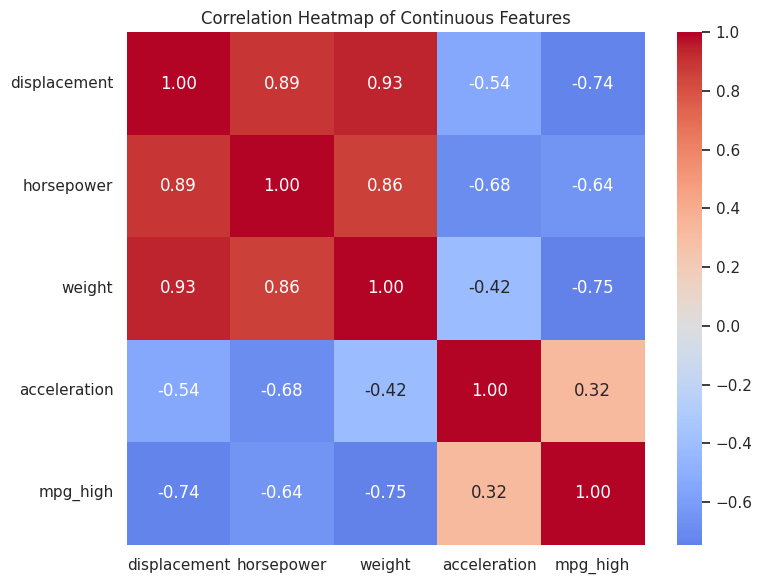

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric columns (including target if you want to see its correlation)
numeric_cols_all = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg_high']

# Compute correlation matrix
corr_matrix = df[numeric_cols_all].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of Continuous Features")
plt.tight_layout()
plt.show()


### Correlation Analysis of Continuous Features

The heatmap shows several strong correlations:

- `displacement`, `horsepower`, and `weight` have high positive correlation with each other (correlation > 0.85), suggesting potential multicollinearity. In supervised learning, we generally expect input features to be uncorrelated with each other and to show strong correlation with the target variable. We can use PCA to combine these correlated features into fewer, more uncorrelated features.


- `acceleration` is negatively correlated with all three above, especially `horsepower` (−0.68), suggesting cars with higher horsepower tend to accelerate more slowly (possibly due to weight).
- The target variable `mpg_high` shows strong negative correlation with `displacement` (−0.74), `weight` (−0.75), and `horsepower` (−0.64), meaning cars with higher values in these features are more likely to have **low** fuel efficiency.
- `acceleration` shows a weak positive correlation with `mpg_high` (+0.32), hinting that faster-accelerating cars may have better fuel efficiency, though the relationship is not very strong.


# **Univariate Analysis**

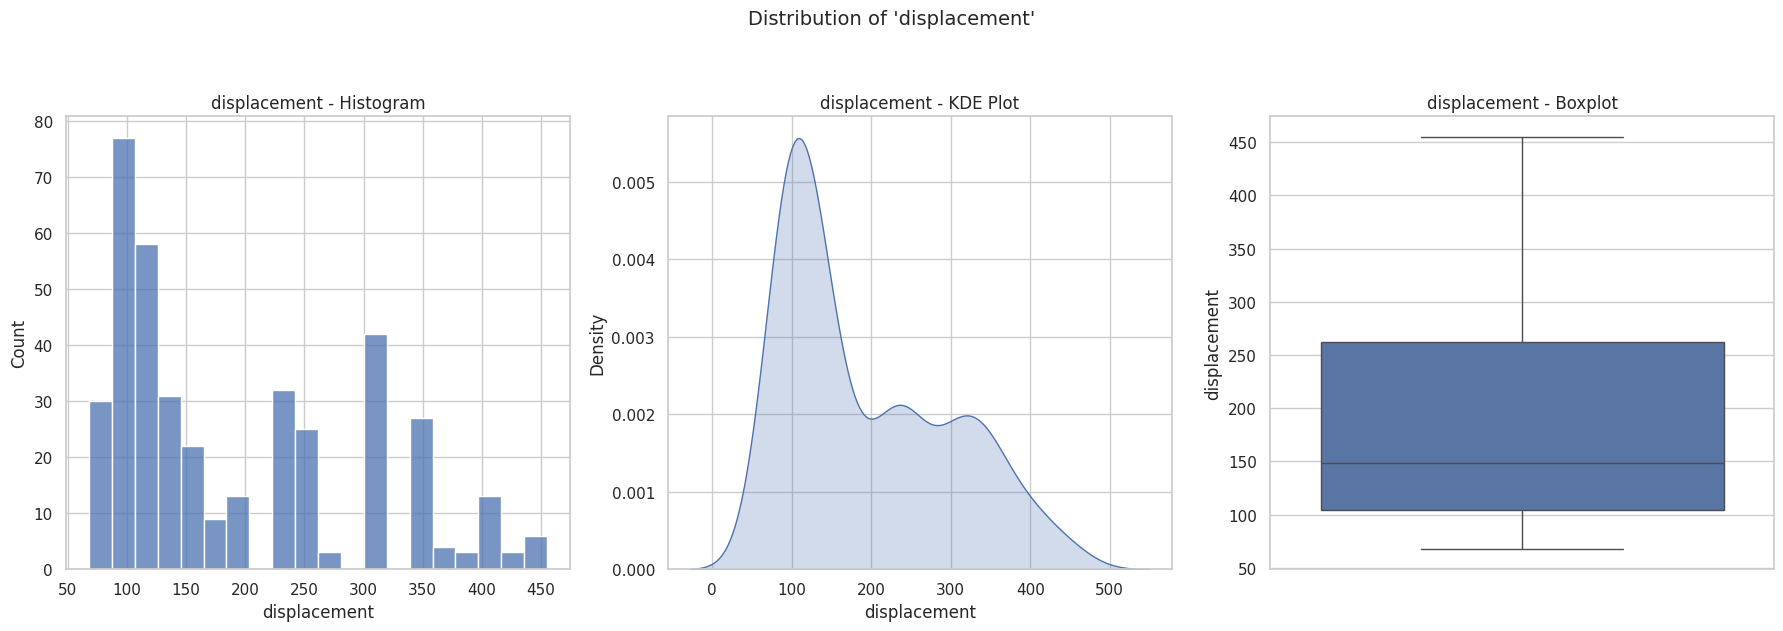

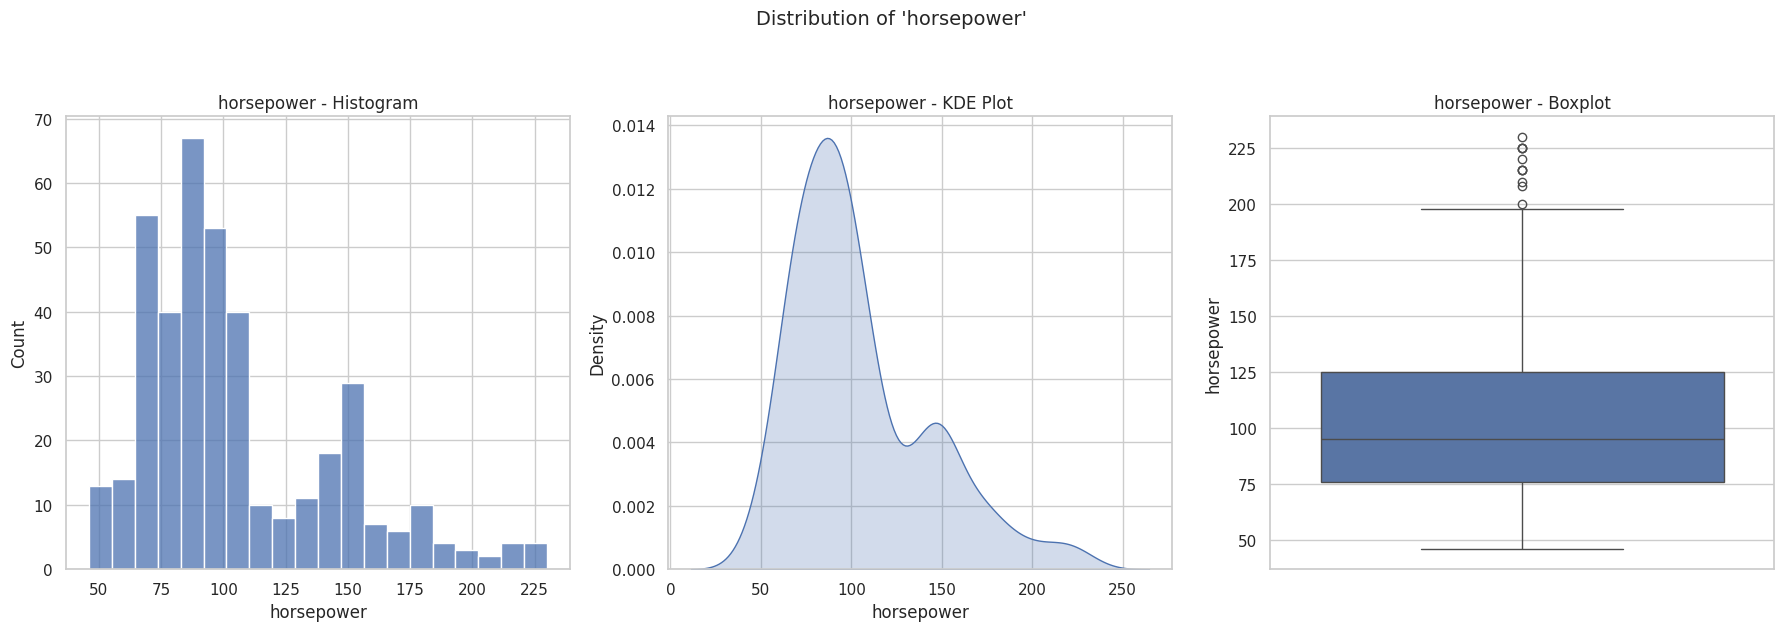

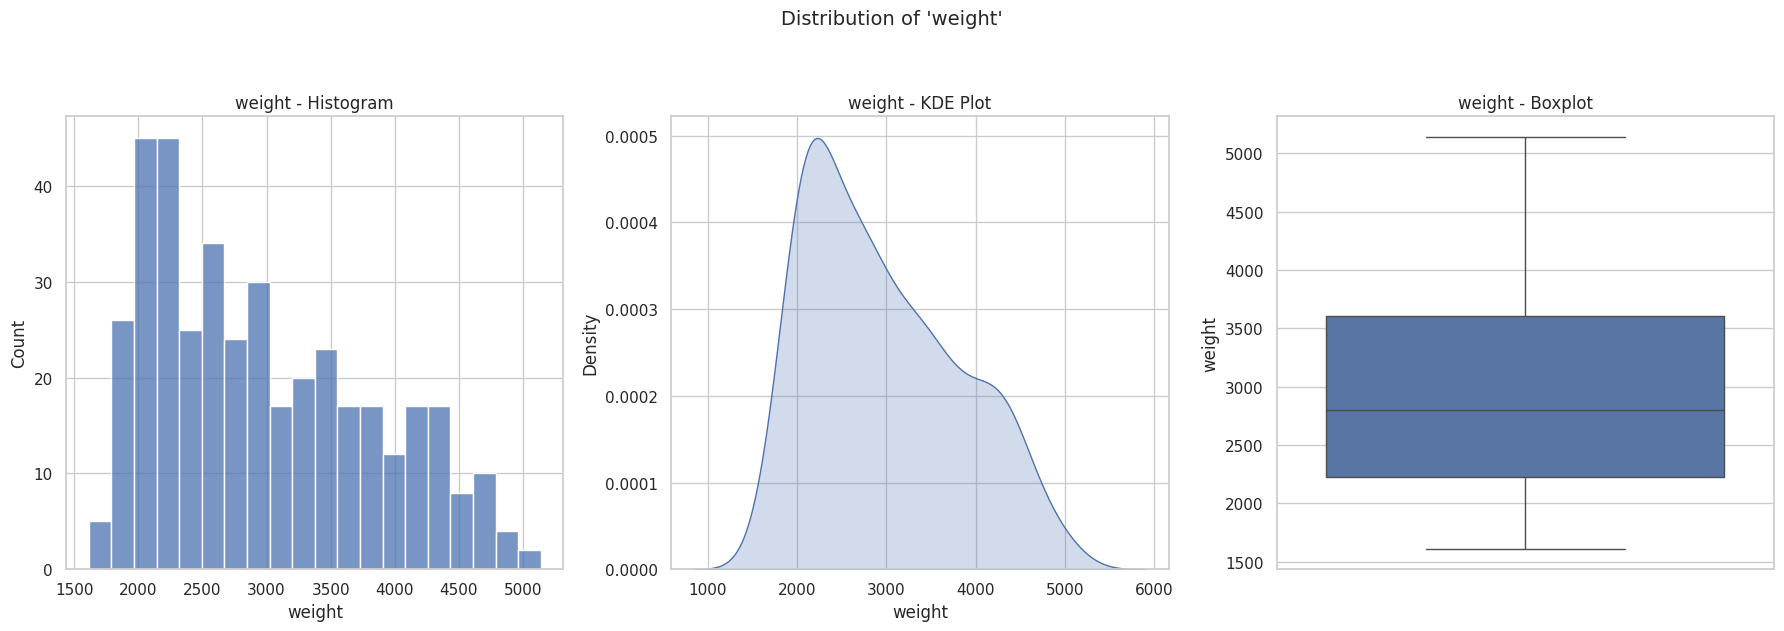

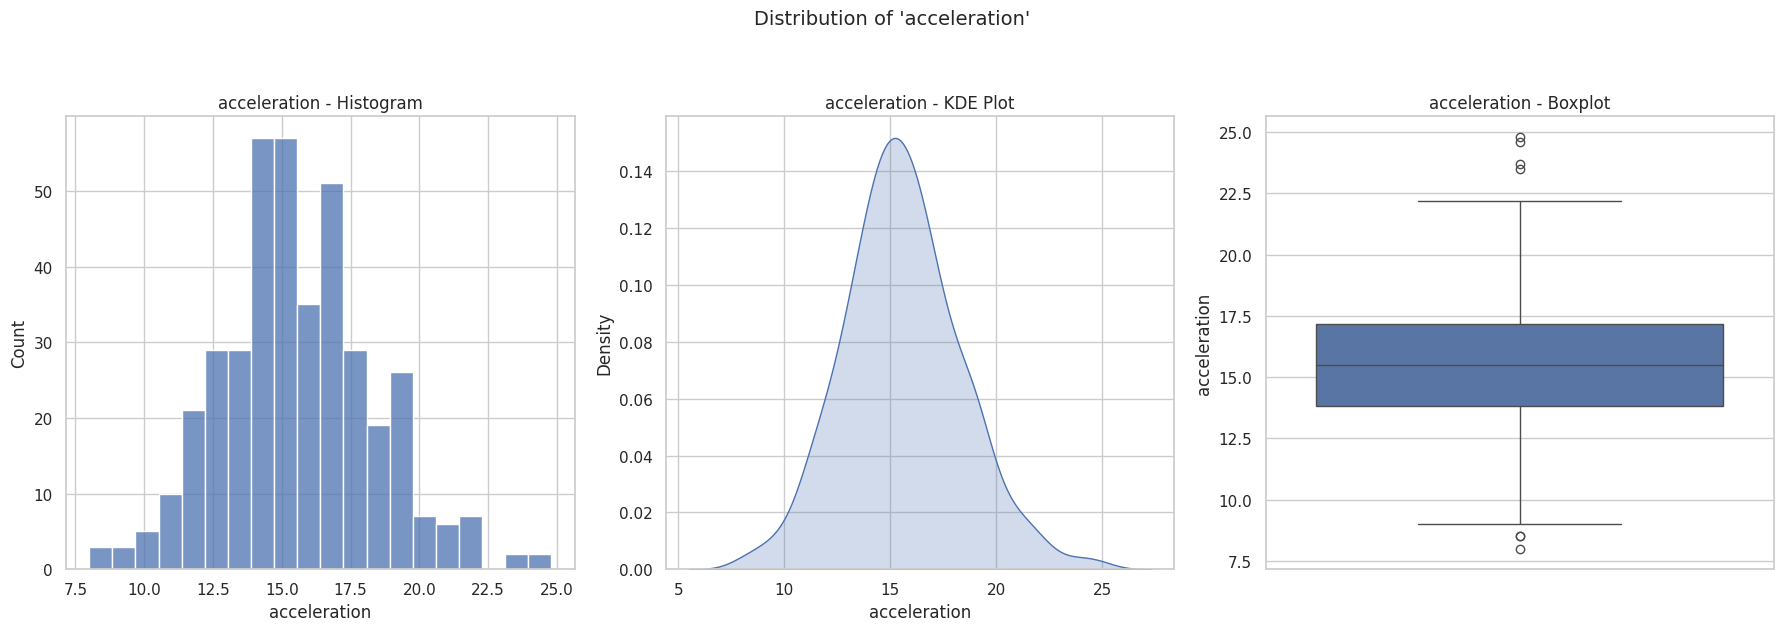

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous features
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Style
sns.set(style="whitegrid")

# Plot loop (no hue)
for col in numeric_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Histogram
    sns.histplot(data=df, x=col, bins=20, kde=False, ax=axes[0])
    axes[0].set_title(f"{col} - Histogram")

    # 2. KDE
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[1])
    axes[1].set_title(f"{col} - KDE Plot")

    # 3. Vertical Boxplot
    sns.boxplot(data=df, y=col, ax=axes[2])
    axes[2].set_title(f"{col} - Boxplot")

    plt.suptitle(f"Distribution of '{col}'", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()


### Observations

- **Displacement** is **right-skewed**, with most values concentrated between 100 and 250. The KDE (Knowledge Density Estimation) curve shows a long tail toward higher values. The boxplot confirms a wide range with a few high-end values, but no extreme outliers.
- **Horsepower** is also **right-skewed**, with a strong peak around 80–100. The KDE curve shows multiple modes, indicating possible subgroups. The boxplot reveals several outliers on the higher end (above 200).
- **Weight** is right-skewed, with most values between 2000 and 3500. The KDE plot confirms a long tail towards heavier cars, and the boxplot shows no extreme outliers, but a wide spread.
- **Acceleration** is approximately symmetric and bell-shaped, suggesting a nearly normal distribution. Most values fall between 13 and 19, as seen in both histogram and KDE plot.
- The boxplot for acceleration reveals a few high-end outliers above 22, but the overall spread is compact.
- Unlike the other three features, acceleration appears well-centered and less skewed



# **Univariate Analysis by class-based coloring**

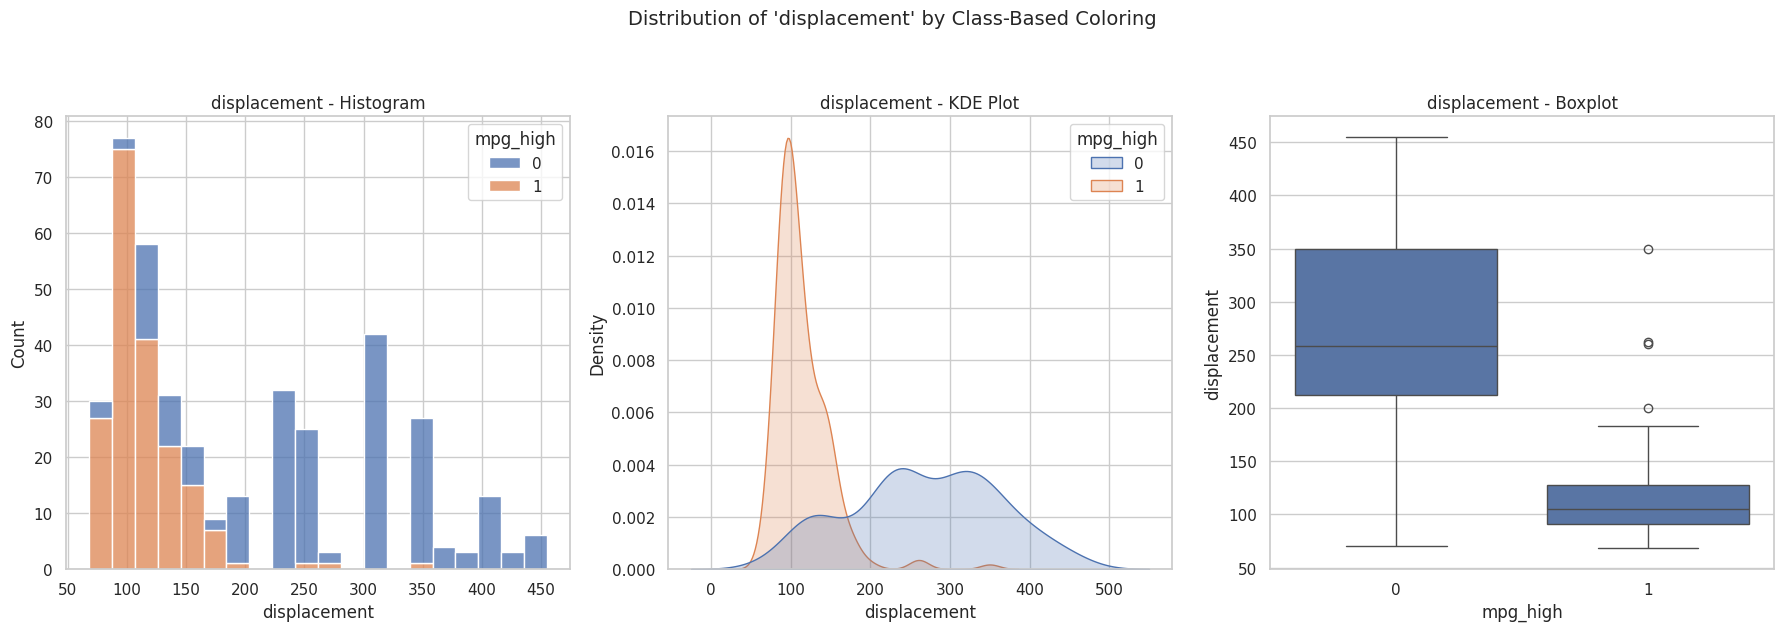

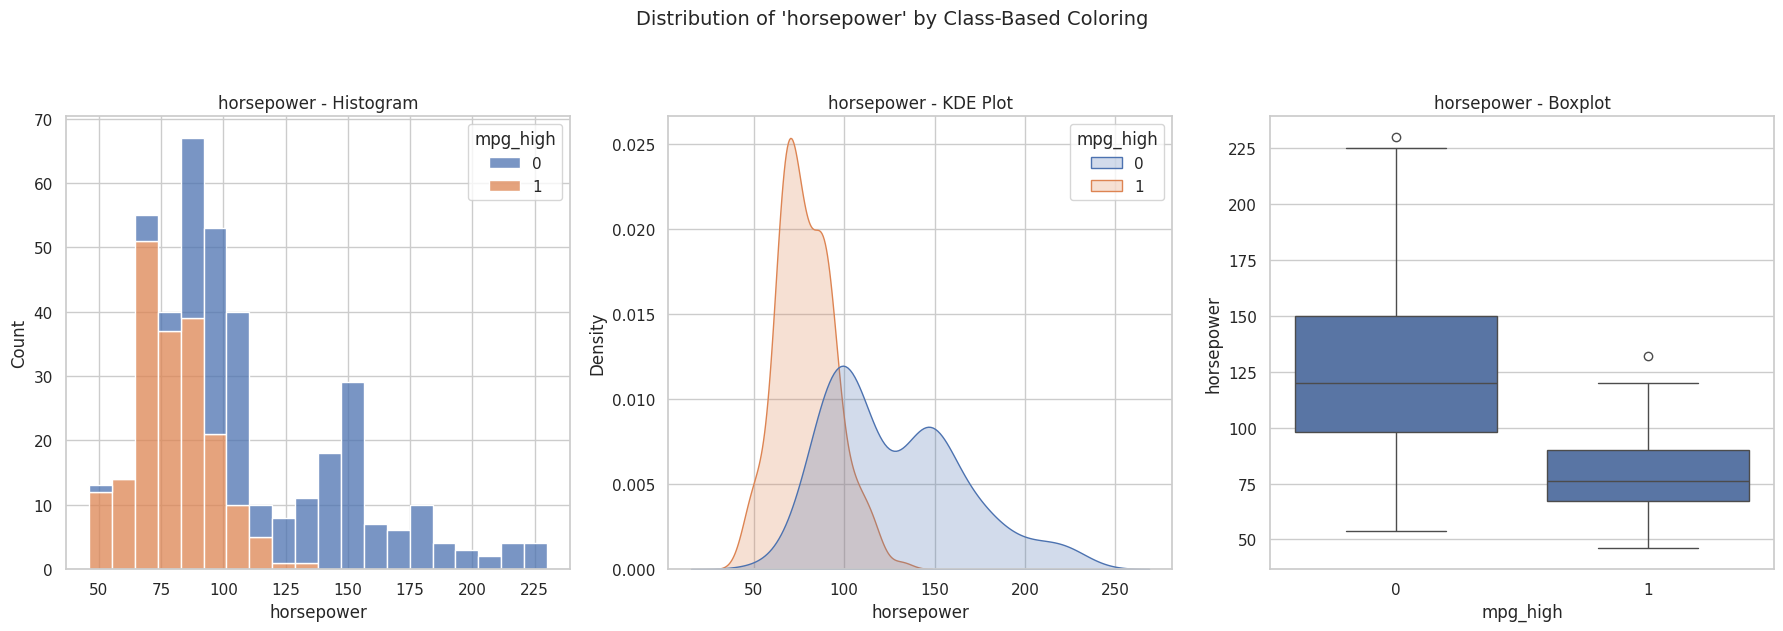

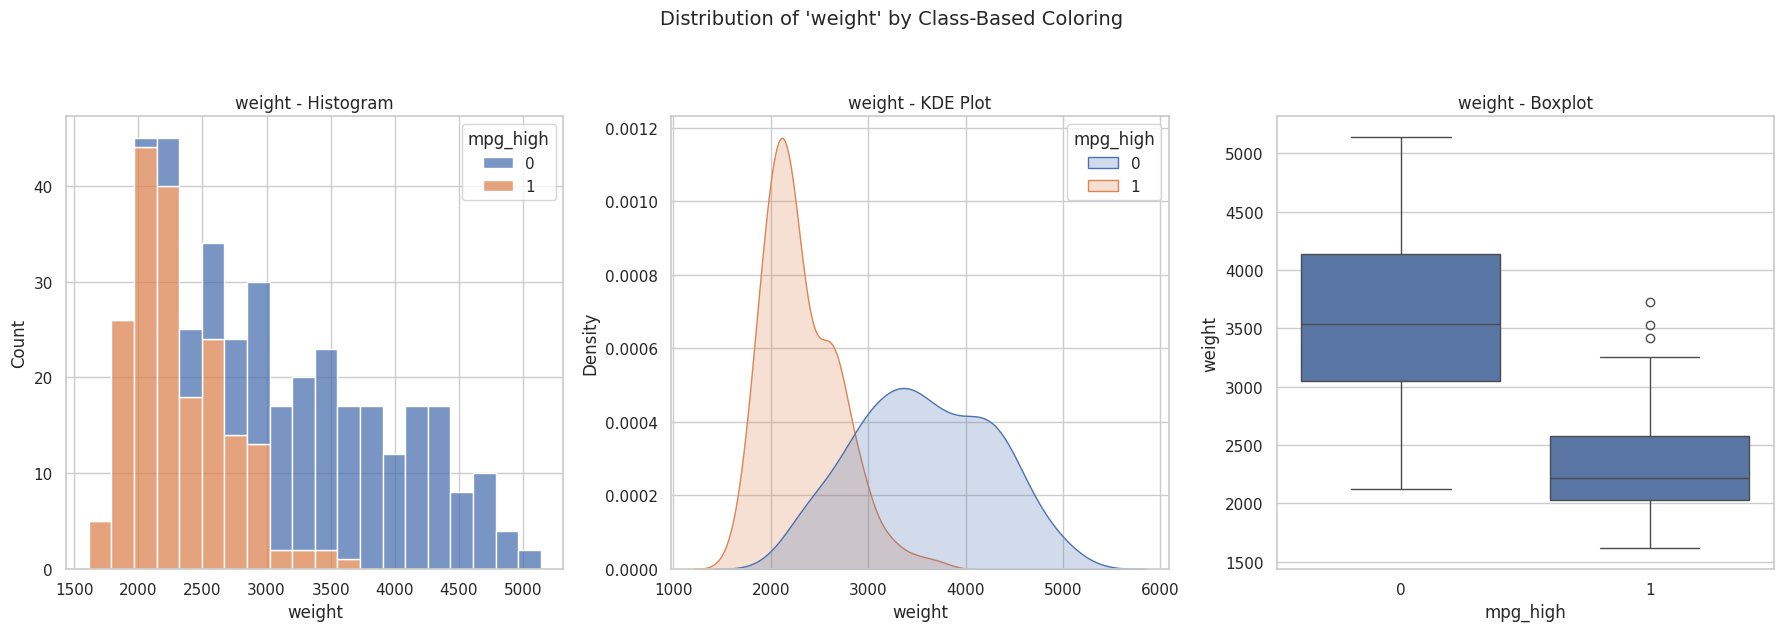

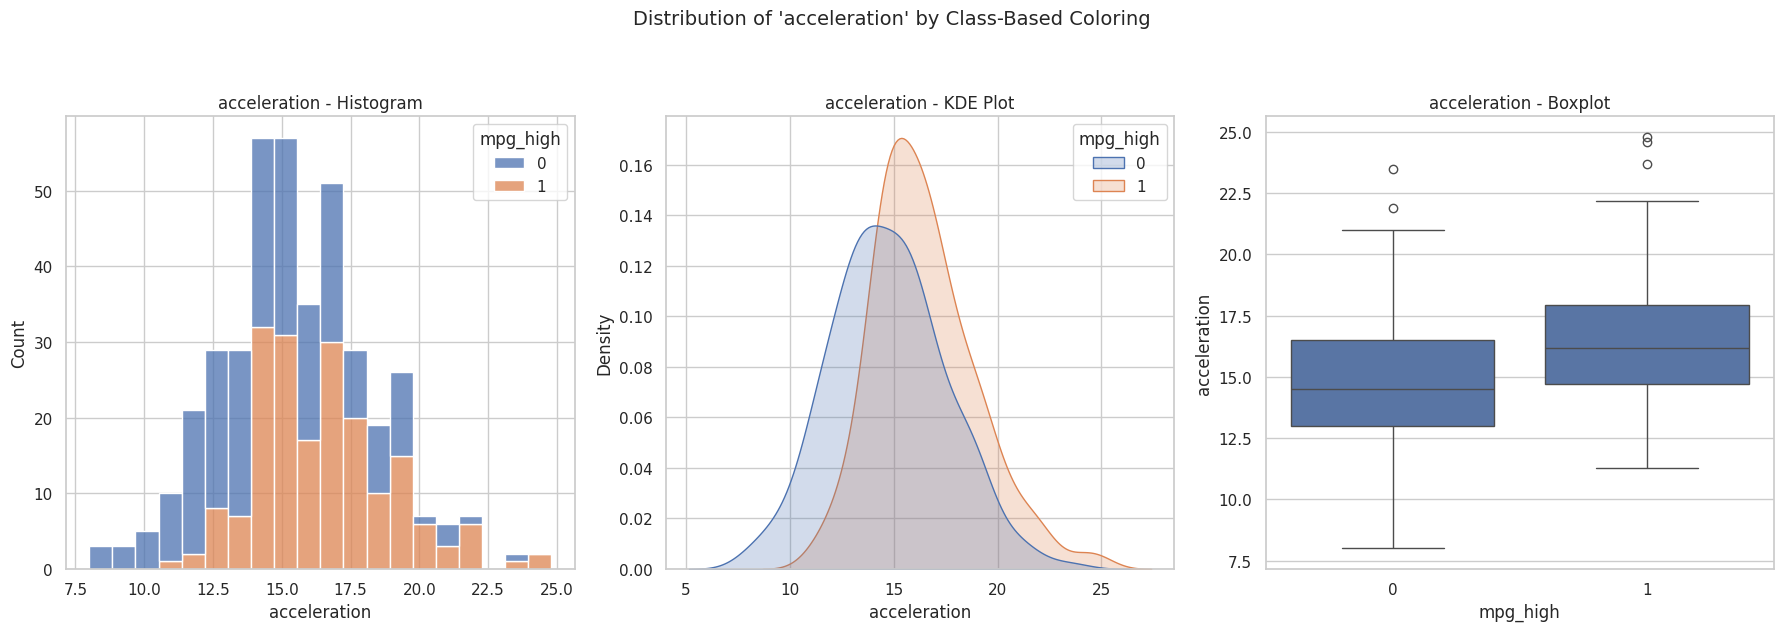

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your continuous/numeric features
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Set seaborn style
sns.set(style="whitegrid")

# Create plots
for col in numeric_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Histogram
    sns.histplot(data=df, x=col, hue='mpg_high', multiple='stack', bins=20, ax=axes[0])
    axes[0].set_title(f"{col} - Histogram")

    # 2. KDE Plot
    sns.kdeplot(data=df, x=col, hue='mpg_high', fill=True, common_norm=False, ax=axes[1])
    axes[1].set_title(f"{col} - KDE Plot")

    # 3. Boxplot (fix axis)
    sns.boxplot(data=df, x='mpg_high', y=col, ax=axes[2])
    axes[2].set_title(f"{col} - Boxplot")
    axes[2].set_xlabel("mpg_high")
    axes[2].set_ylabel(col)

    plt.suptitle(f"Distribution of '{col}' by Class-Based Coloring", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()


### **Observation from  pairplot with class-based coloring**

### Class-Wise Distribution Summary

- **Displacement:** Histogram and KDE show that high-efficiency cars are clustered at low displacement, while low-efficiency cars are spread over a wider, higher range. Boxplot shows a clear downward shift in median displacement for high-efficiency cars with no major overlap.

- **Horsepower:** Histogram and KDE indicate high-efficiency cars peak at lower horsepower, with low-efficiency cars having a longer right tail. Boxplot shows lower median and tighter IQR (Inter Quartile Range) for high-efficiency cars, while low-efficiency cars show more spread and outliers.


- **Weight:** Histogram and KDE show high-efficiency cars are concentrated at lower weights, while low-efficiency cars span a much higher range.  Boxplot clearly separates the two classes, with high-efficiency cars having much lower median and tighter spread.

- **Acceleration:** Histogram and KDE show high-efficiency cars tend to have slightly higher acceleration values, though overlap exists. Boxplot shows a modest upward shift in median acceleration for high-efficiency cars, with more outliers on both sides.



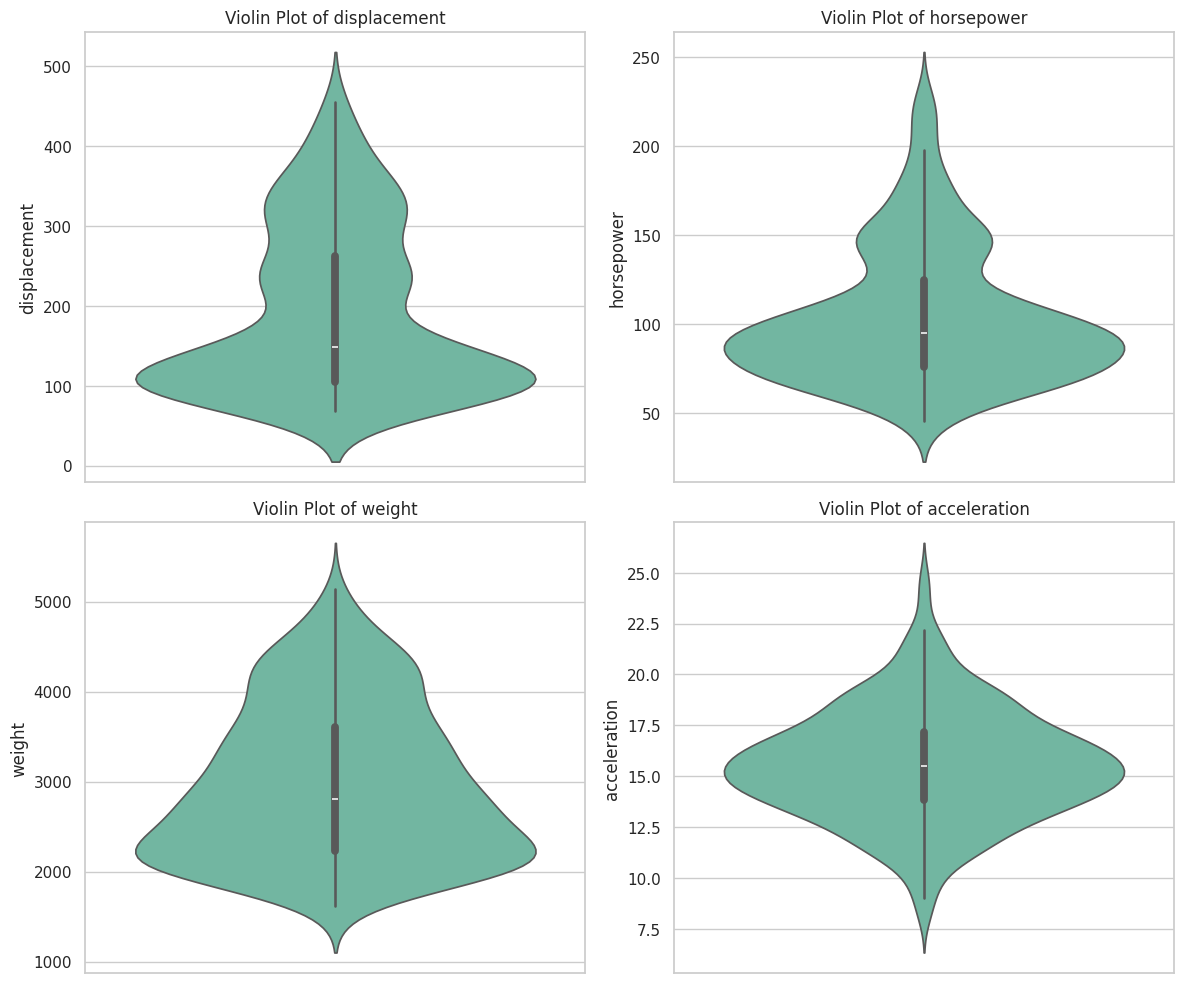

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric features
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Set style
sns.set(style="whitegrid")

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.violinplot(data=df, y=col, ax=axes[i], inner='box', palette='Set2')
    axes[i].set_title(f"Violin Plot of {col}")
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()


### Observation from violinplot


Violin plots combine the distributional insight of KDE plots with the summary statistics of boxplots into a single visual. The patterns observed here are consistent with previous analyses: displacement, horsepower, and weight are right-skewed with broader spread, while acceleration is more symmetric and tightly distributed.



# **Violin plots based on class-based coloring**

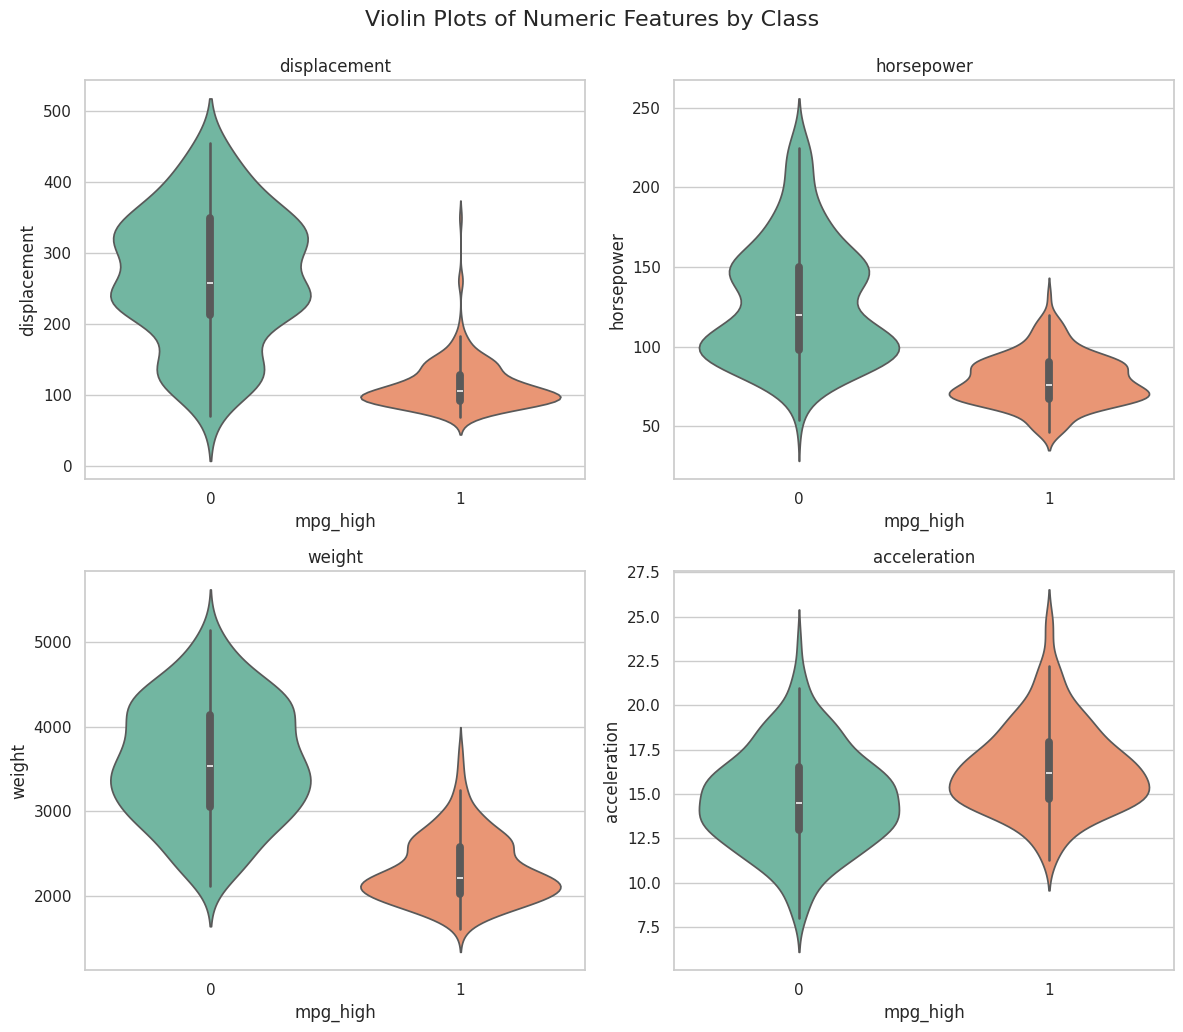

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure mpg_high is treated as a category
df['mpg_high'] = df['mpg_high'].astype(str)

# Define numeric features
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Set seaborn style
sns.set(style="whitegrid")

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot vertical violins for each feature split by mpg_high
for i, col in enumerate(numeric_cols):
    sns.violinplot(data=df, x='mpg_high', y=col, inner='box', palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("mpg_high")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle("Violin Plots of Numeric Features by Class", fontsize=16, y=1.03)
plt.show()


### Observation from violin plot based on class-based coloring

These violin plots combine KDE and boxplot information to show class-wise distributions. As before, high-efficiency cars (`mpg_high = 1`) have visibly lower displacement, horsepower, and weight, while acceleration is slightly higher. Displacement and weight show the strongest separation between classes.
